<a href="https://colab.research.google.com/github/sumitc29/machine_learning/blob/master/Clustering_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustering Problem**

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


In [0]:
#data reading and analysis
import pandas as pd
data = pd.read_csv("/content/Analytics Test Dataset.csv")

In [0]:
temp= data
data.head(5)

,utc_timestamp,User_ID,Revenue,Player Level,Pack_ID,CountryCode
0,1468617177,6.129880e+18,793,14,bundle3b,fr
1,1468617210,8.406580e+18,698,51,vipoffer1,VE
2,1468622155,5.284030e+18,234,49,goldentickets2,GB
3,1468623026,1.530870e+19,1542,40,vipoffer2,US
4,1468621477,1.439260e+19,209,43,goldentickets2,US


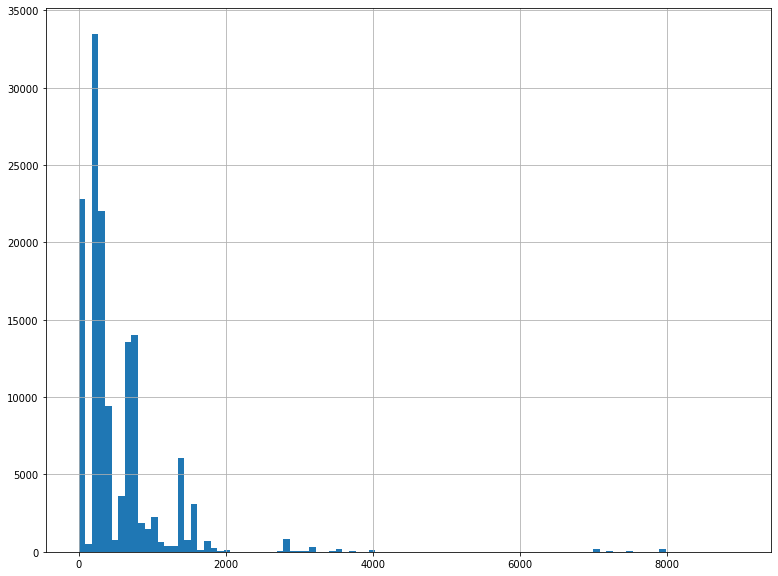

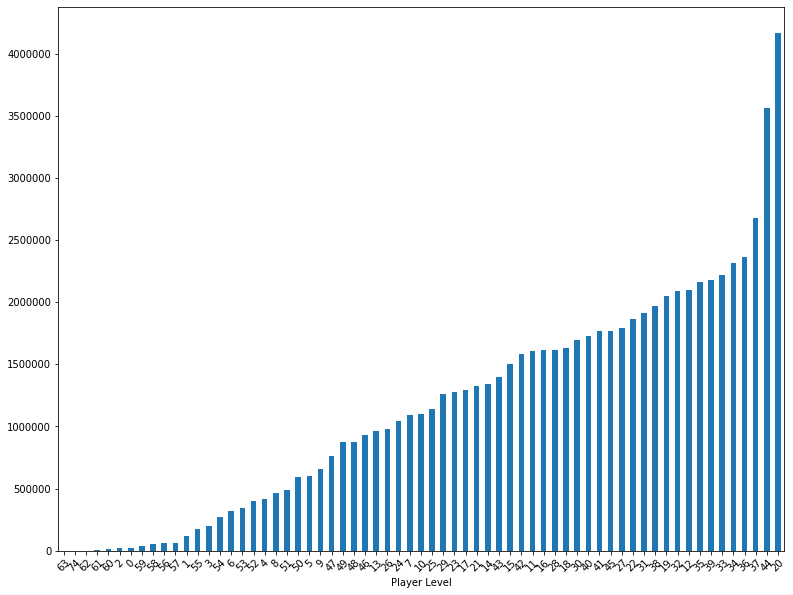

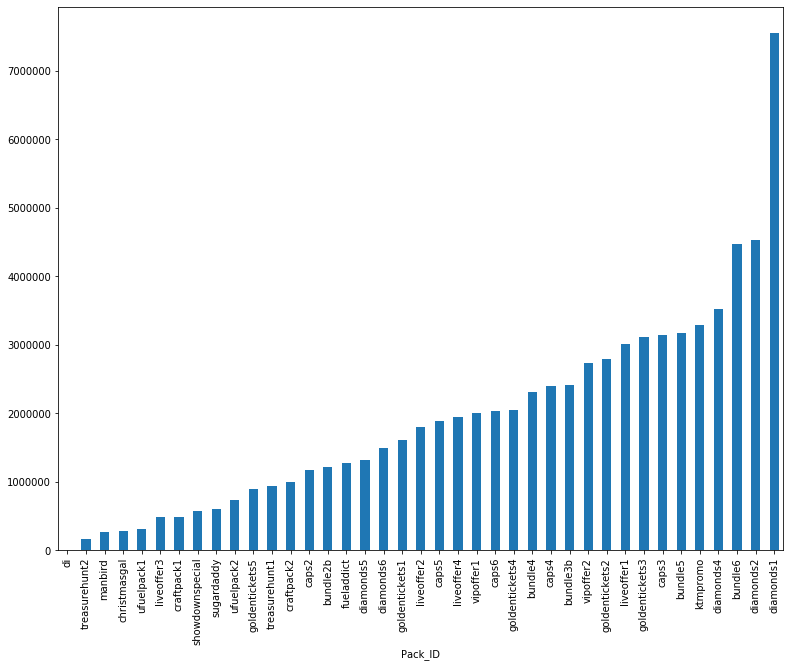

<Figure size 216x288 with 0 Axes>

In [0]:

#packid vs revenue
plt.figure(figsize=(13,10))
data.Revenue.hist(bins = 100)
plt.show()

#player_level vs revenue
plt.figure(figsize=(13,10))
data.groupby(['Player Level']).sum()['Revenue'].sort_values().plot(kind= 'bar')
plt.xticks(rotation=45)
plt.show()

#packid vs revenue
plt.figure(figsize=(13,10))
data.groupby(['Pack_ID']).sum()['Revenue'].sort_values().plot(kind= 'bar')
plt.figure(figsize=(3,4))
plt.show()


**clustering can be done in 2 ways**
* with respect to revenue
* with respect to PLayer_level, Package_ID and country code.

Both are illustrated  

## **with respect to revenue**

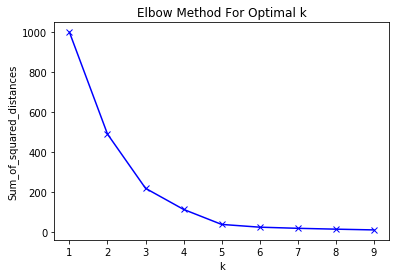

In [0]:
#finding k number of best clusters
data = temp


data.drop(['utc_timestamp', 'Pack_ID', 'User_ID' , 'CountryCode','Player Level'], axis =1 , inplace = True)
data.head()

mms = MinMaxScaler()
#mms.fit(data)
data_transformed = mms.fit_transform(data)

Sum_of_squared_distances = []
K = range(1,10 )
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here we can see that k =5 

In [0]:

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)


In [0]:
kmeans.cluster_centers_

array([[ 228.09205471],
       [1452.35415668],
       [7443.18721461],
       [ 733.3120385 ],
       [3086.17155928]])

In [0]:
pred_y

array([0, 0, 3, ..., 0, 0, 0], dtype=int32)

## **with respect to PLayer_level, Package_ID and country code.**

In [0]:
data = temp

In [0]:
data.drop(["utc_timestamp" , "User_ID" ,"Revenue" ], axis= 1, inplace = True)

In [0]:
data.head(3)

,Player Level,Pack_ID,CountryCode
0,14,bundle3b,fr
1,51,vipoffer1,VE
2,49,goldentickets2,GB


In [0]:
from sklearn import preprocessing
for each in data.columns:
  le = preprocessing.LabelEncoder()
  data[each] = le.fit_transform(data[each].to_list())

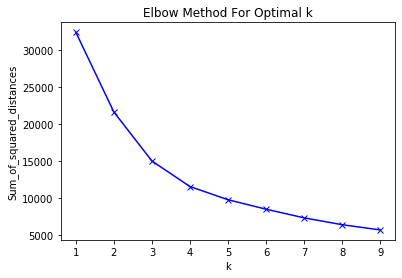

In [0]:
mms = MinMaxScaler()
#mms.fit(data)
data_transformed = mms.fit_transform(data)

Sum_of_squared_distances = []
K = range(1,10 )
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)


In [0]:
pred_y

array([0, 0, 3, ..., 0, 0, 0], dtype=int32)

In [0]:
kmeans.cluster_centers_

array([[ 28.25335568,  14.28819768, 132.58143664],
       [ 16.37608373,   9.59625547,  32.93852696],
       [ 26.98345894,  14.03650778, 219.18968386],
       [ 40.762017  ,  18.36649341,  41.15137596]])